# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.255456e+01     8.181114e+00
 * time: 0.0019071102142333984
     1     3.189314e+01     5.883093e+00
 * time: 0.008192062377929688
     2     2.354635e+01     7.367631e+00
 * time: 0.015662193298339844
     3     2.334465e+01     1.035974e+01
 * time: 0.02258610725402832
     4     1.322720e+01     2.436816e+00
 * time: 0.030419111251831055
     5     1.038191e+01     1.585105e+00
 * time: 0.03729104995727539
     6     9.866806e+00     1.561691e+00
 * time: 0.0448300838470459
     7     9.313429e+00     9.144973e-01
 * time: 0.05065321922302246
     8     8.971155e+00     8.284734e-01
 * time: 0.05696606636047363
     9     8.767698e+00     8.096437e-01
 * time: 0.06345605850219727
    10     8.547647e+00     5.621432e-01
 * time: 0.06997513771057129
    11     8.410716e+00     6.949371e-01
 * time: 0.07624602317810059
    12     8.297841e+00     5.329350e-01
 * time: 0.08193516731262207
    13     8.283105e+00     6.959399e-01
 * t

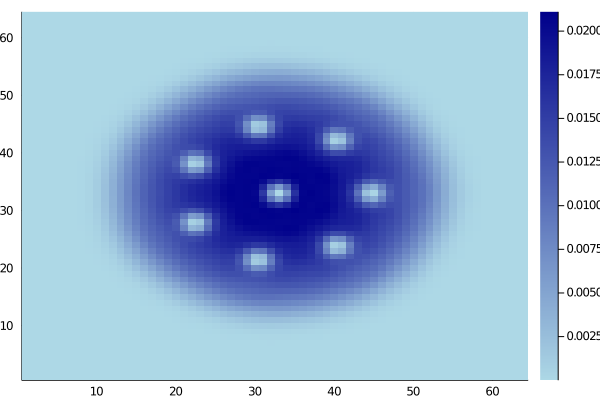

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)